¡Hola, Ricardo!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
Ya he realizado los cambios especificados, quedo atento a cualquier corrección. Muchas gracias de antemano.

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Ricardo! Has hecho un excelente trabajo con el proyecto, cada vez más cercas de convertirte en un cientifico de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas d ehipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

# Propósito
El objetivo principal de este proyecto es analizar los datos de clientes de Megaline para determinar cuál de las dos tarifas de prepago, Surf o Ultimate, genera más ingresos. Esta información será crucial para que el departamento comercial pueda ajustar el presupuesto de publicidad de manera más eficiente.

# Acciones a realizar
1. Exploración y limpieza de datos
2. Análisis descriptivo
3. Prueba de hipótesis
4. Análisis
5. Conclusiones y recomendaciones

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import scipy as sci
import seaborn as sns 
from scipy.stats import ttest_ind
from matplotlib import pyplot as plt 
import math

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

### Corregido

## Cargar datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames
df_calls=pd.read_csv("C:/Ricardo Pineda/Tripleten/Pro/S5 Análisis estadístico de datos/Proyecto S5/Datasets/megaline_calls.csv", sep=',', header=0)
df_internet=pd.read_csv("C:/Ricardo Pineda/Tripleten/Sprints/S5 Análisis estadístico de datos/Proyecto S5/Datasets/megaline_internet.csv", sep=',', header=0)
df_messages=pd.read_csv("C:/Ricardo Pineda/Tripleten/Sprints/S5 Análisis estadístico de datos/Proyecto S5/Datasets/megaline_messages.csv", sep=',', header=0)
df_plans=pd.read_csv("C:/Ricardo Pineda/Tripleten/Sprints/S5 Análisis estadístico de datos/Proyecto S5/Datasets/megaline_plans.csv", sep=',', header=0)
df_users=pd.read_csv("C:/Ricardo Pineda/Tripleten/Sprints/S5 Análisis estadístico de datos/Proyecto S5/Datasets/megaline_users.csv", sep=',', header=0)

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
# Imprime una muestra de los datos para las tarifas
df_plans.info()
df_plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


RESPUESTA: 
No veo errores en los datos. Sin embargo, hay cambios que nos van a ser útiles más adelante como convertir los mb por mes a gb por mes y cambiar el nombre de la columna plan_name a plan.

## Corregir y enriquecer datos

In [4]:
df_plans = df_plans.rename(columns={'plan_name': 'plan'})
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Es correcto considerar que 1024 megabytes son 1 gigabytes.
    
</div>

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
# Imprime una muestra de datos para usuarios
df_users.info()
df_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


RESPUESTA: Se tiene que checar que no haya valores duplicados, además de corregir el formato de object a datetime de reg_date y de churn_date. Pensaba que había que corregir los valores NaN de churn_date pero eso quiere decir que los usuarios están activos.

### Corregir y enriquecer los datos

In [6]:
print(df_users.duplicated().sum())
print(df_users['user_id'].duplicated().sum())

# Convertir las columnas de fecha a datetime con el formato especificado
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

df_users.info()


0
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB



<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

### Corregido

## Llamadas

In [7]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
# Imprime una muestra de datos para las llamadas
df_calls.info()
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


RESPUESTA: No tenemos valores ausentes pero necesitamos cambiar call_date a formato de fecha y agregar una columna con el redondeo hacia arriba de la duración del la llamada. Además de mostrar los datos agrupados por mes.

### Corregir y enriquecer los datos

In [8]:
print(df_calls.duplicated().sum())
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls['duration'] = df_calls['duration'].astype(int)
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.head()

0


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo en redondear la duración de las llamadas.
    
</div>

## Mensajes

In [9]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
# Imprime una muestra de datos para los mensajes
df_messages.info()
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


RESPUESTA: No tenemos valores ausentes pero tenemos que corregir a fecha message_date y agregar la columna month.

### Corregir los datos y enriquecer los datos

In [10]:
print(df_messages.duplicated().sum()) 
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.info()
df_messages.head()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.0+ MB


,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [11]:
# Imprime la información general/resumida sobre el DataFrame de internet
# Imprime una muestra de datos para el tráfico de internet
df_internet.info()
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


RESPUESTA: Tenemos que corregir a datetime la columna session date, agregar la columna month y gb per month.

### Corregir los datos y enriquecer los datos

In [12]:
print(df_internet.duplicated().sum()) 
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet['month'] = df_internet['session_date'].dt.month
df_internet['gb_used'] = df_internet['mb_used'] / 1024
df_internet.info()
df_internet.head()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int32         
 5   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(1)
memory usage: 4.4+ MB


,id,user_id,session_date,mb_used,month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590


## Estudiar las condiciones de las tarifas

In [13]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario

In [14]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_user_month = df_calls.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
calls_per_user_month = calls_per_user_month.rename(columns={'id': 'total_calls'})
calls_per_user_month.head()

,user_id,month,total_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>



### Lo tendré en cuenta para el siguiente proyecto. Lo dejé como está actualmente para que no me aparecieran errores más adelante.

In [15]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_user_month = df_calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()
minutes_per_user_month=minutes_per_user_month.rename(columns={'duration': 'total_mins'})
minutes_per_user_month.head()

,user_id,month,total_mins
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


In [16]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_user_month = df_messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
messages_per_user_month = messages_per_user_month.rename(columns={'id': 'total_messages'})
messages_per_user_month.head()

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [17]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_per_user_month = df_internet.groupby(['user_id', 'month']).agg({'gb_used': 'sum'}).reset_index()
internet_per_user_month = internet_per_user_month.rename(columns={'mb_used': 'total_gb'})
internet_per_user_month.head()

,user_id,month,gb_used
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754
3,1001,10,21.807119
4,1001,11,18.070605


## Fusionar datos

In [18]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
usage_data = calls_per_user_month.merge(minutes_per_user_month, on=['user_id', 'month'])
usage_data = usage_data.merge(messages_per_user_month, on=['user_id', 'month'])
usage_data = usage_data.merge(internet_per_user_month, on=['user_id', 'month'])
usage_data.head()

,user_id,month,total_calls,total_mins,total_messages,gb_used
0,1000,12,16,124,11,1.856904
1,1001,8,27,182,30,6.756982
2,1001,9,49,315,44,13.002754
3,1001,10,65,393,53,21.807119
4,1001,11,64,426,36,18.070605


In [19]:
# Añadir la información de df_users
usage_data = usage_data.merge(df_users[['user_id', 'plan', 'first_name', 'last_name', 'age', 'city']], on='user_id')
usage_data.head()

,user_id,month,total_calls,total_mins,total_messages,gb_used,plan,first_name,last_name,age,city
0,1000,12,16,124,11,1.856904,ultimate,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27,182,30,6.756982,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49,315,44,13.002754,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65,393,53,21.807119,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64,426,36,18.070605,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA"


In [20]:
# Añade la información de la tarifa
usage_data = usage_data.merge(df_plans, left_on='plan', right_on='plan')
usage_data.head()

,user_id,month,total_calls,total_mins,total_messages,gb_used,plan,first_name,last_name,age,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,12,16,124,11,1.856904,ultimate,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,30.0
1,1001,8,27,182,30,6.756982,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,15.0
2,1001,9,49,315,44,13.002754,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,15.0
3,1001,10,65,393,53,21.807119,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,15.0
4,1001,11,64,426,36,18.070605,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,15.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

## Ingreso mensual por usuario

In [21]:
# Calcular el exceso de minutos
usage_data['extra_minutes'] = usage_data['total_mins'] - usage_data['minutes_included']
usage_data['extra_minutes'] = usage_data['extra_minutes'].apply(lambda x: max(x, 0))

# Calcular el exceso de mensajes
usage_data['extra_messages'] = usage_data['total_messages'] - usage_data['messages_included']
usage_data['extra_messages'] = usage_data['extra_messages'].apply(lambda x: max(x, 0))

# Calcular el exceso de datos (en gigabytes, redondeado hacia arriba)
usage_data['extra_gb'] = usage_data['gb_used'] - usage_data['gb_per_month_included']
usage_data['extra_gb'] = usage_data['extra_gb'].apply(lambda x: max(x, 0))
usage_data['extra_gb'] = usage_data['extra_gb'].apply(math.ceil)  # Redondear al alza

# Calcular el costo adicional por minutos
usage_data['cost_extra_minutes'] = usage_data['extra_minutes'] * usage_data['usd_per_minute']

# Calcular el costo adicional por mensajes
usage_data['cost_extra_messages'] = usage_data['extra_messages'] * usage_data['usd_per_message']

# Calcular el costo adicional por datos
usage_data['cost_extra_gb'] = usage_data['extra_gb'] * usage_data['usd_per_gb']

# Calcular el ingreso mensual total para cada usuario
usage_data['monthly_revenue'] = usage_data['usd_monthly_pay'] + usage_data['cost_extra_minutes'] + usage_data['cost_extra_messages'] + usage_data['cost_extra_gb']

# Mostrar la información del DataFrame
usage_data.info()
usage_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                1759 non-null   int64  
 1   month                  1759 non-null   int32  
 2   total_calls            1759 non-null   int64  
 3   total_mins             1759 non-null   int64  
 4   total_messages         1759 non-null   int64  
 5   gb_used                1759 non-null   float64
 6   plan                   1759 non-null   object 
 7   first_name             1759 non-null   object 
 8   last_name              1759 non-null   object 
 9   age                    1759 non-null   int64  
 10  city                   1759 non-null   object 
 11  messages_included      1759 non-null   int64  
 12  mb_per_month_included  1759 non-null   int64  
 13  minutes_included       1759 non-null   int64  
 14  usd_monthly_pay        1759 non-null   int64  
 15  usd_

,user_id,month,total_calls,total_mins,total_messages,gb_used,plan,first_name,last_name,age,...,usd_per_message,usd_per_minute,gb_per_month_included,extra_minutes,extra_messages,extra_gb,cost_extra_minutes,cost_extra_messages,cost_extra_gb,monthly_revenue
0,1000,12,16,124,11,1.856904,ultimate,Anamaria,Bauer,45,...,0.01,0.01,30.0,0,0,0,0.0,0.00,0,70.00
1,1001,8,27,182,30,6.756982,surf,Mickey,Wilkerson,28,...,0.03,0.03,15.0,0,0,0,0.0,0.00,0,20.00
2,1001,9,49,315,44,13.002754,surf,Mickey,Wilkerson,28,...,0.03,0.03,15.0,0,0,0,0.0,0.00,0,20.00
3,1001,10,65,393,53,21.807119,surf,Mickey,Wilkerson,28,...,0.03,0.03,15.0,0,3,7,0.0,0.09,70,90.09
4,1001,11,64,426,36,18.070605,surf,Mickey,Wilkerson,28,...,0.03,0.03,15.0,0,0,4,0.0,0.00,40,60.00


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario que ya tengamos los valoresredondear la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>

### Corregido

## Estudia el comportamiento de usuario

### Estadística descriptiva

### Llamadas

In [22]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

avg_call_duration_per_plan_month = usage_data.groupby(['plan', 'month'])['total_mins'].mean().reset_index()
avg_call_duration_per_plan_month = avg_call_duration_per_plan_month.rename(columns={'total_mins': 'avg_call_duration'})

# Mostrar las estadísticas descriptivas
print("Duración promedio de llamadas por cada plan y por cada mes:")
avg_call_duration_per_plan_month.head()

Duración promedio de llamadas por cada plan y por cada mes:


,plan,month,avg_call_duration
0,surf,1,292.000000
1,surf,2,331.200000
2,surf,3,344.937500
3,surf,4,366.228571
4,surf,5,443.981132


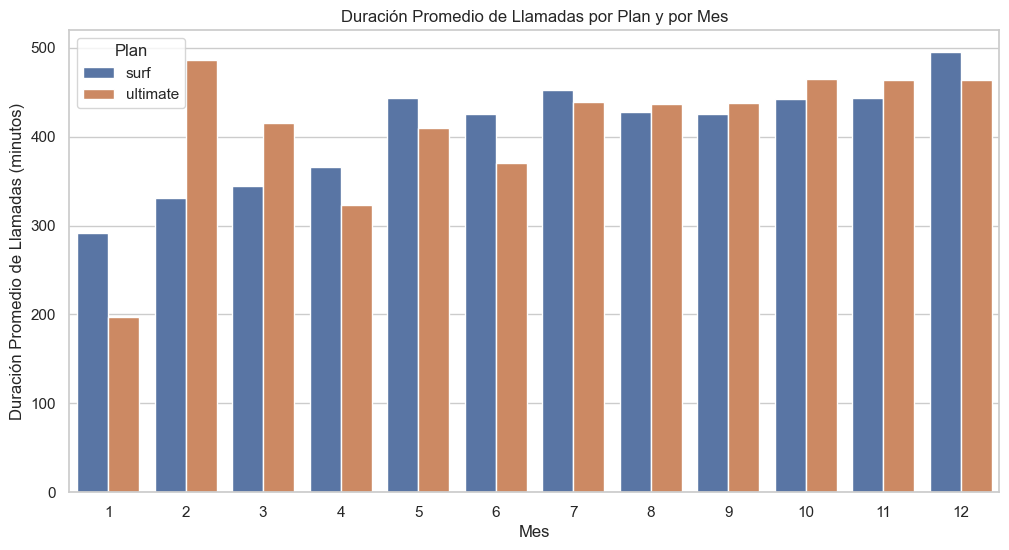

In [23]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_call_duration_per_plan_month, x='month', y='avg_call_duration', hue='plan')

# Añadir etiquetas y título al gráfico
plt.title('Duración Promedio de Llamadas por Plan y por Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas (minutos)')
plt.legend(title='Plan')
plt.show()

In [24]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

minutes_per_plan_month = usage_data.groupby(['plan', 'month'])['total_mins'].sum().reset_index()

# Mostrar las estadísticas descriptivas
print("Número total de minutos usados por cada usuario en cada plan mensualmente:")
minutes_per_plan_month.head()

Número total de minutos usados por cada usuario en cada plan mensualmente:


,plan,month,total_mins
0,surf,1,292
1,surf,2,1656
2,surf,3,5519
3,surf,4,12818
4,surf,5,23531


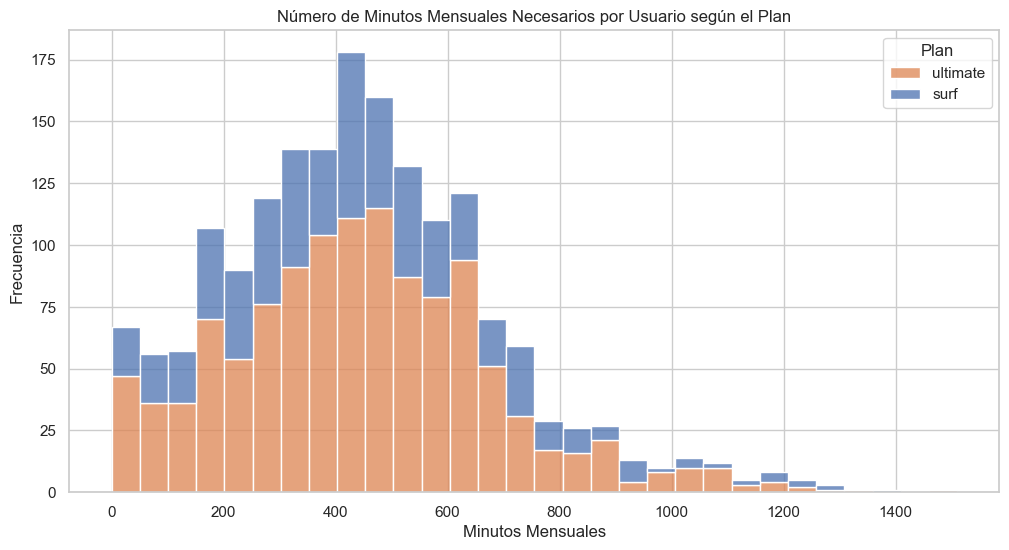

In [25]:
# Crear el histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=usage_data, x='total_mins', hue='plan', multiple='stack', bins=30)

# Añadir etiquetas y título al gráfico
plt.title('Número de Minutos Mensuales Necesarios por Usuario según el Plan')
plt.xlabel('Minutos Mensuales')
plt.ylabel('Frecuencia')
plt.legend(title='Plan', labels=usage_data['plan'].unique())
plt.show()

In [26]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Agrupar por user_id y month para obtener la duración mensual de llamadas de cada usuario
monthly_call_duration = usage_data.groupby(['user_id', 'month'])['total_mins'].sum().reset_index()

# Calcular la media de la duración mensual de llamadas
mean_call_duration = monthly_call_duration['total_mins'].mean()

# Calcular la varianza de la duración mensual de llamadas
var_call_duration = monthly_call_duration['total_mins'].var()

# Mediana y desviación estándar 
med_call_duration= monthly_call_duration['total_mins'].median()
std_call_duration= var_call_duration**0.5

# Mostrar los resultados
print(f"Media de la duración mensual de llamadas: {mean_call_duration:.2f} minutos")
print(f"Varianza de la duración mensual de llamadas: {var_call_duration:.2f} minutos^2")
print(f"Mediana de la duración mensual de llamadas: {med_call_duration:.2f} minutos")
print(f"Desviación estándar de la duración mensual de llamadas: {std_call_duration:.2f} minutos")

Media de la duración mensual de llamadas: 444.70 minutos
Varianza de la duración mensual de llamadas: 57582.92 minutos^2
Mediana de la duración mensual de llamadas: 433.00 minutos
Desviación estándar de la duración mensual de llamadas: 239.96 minutos


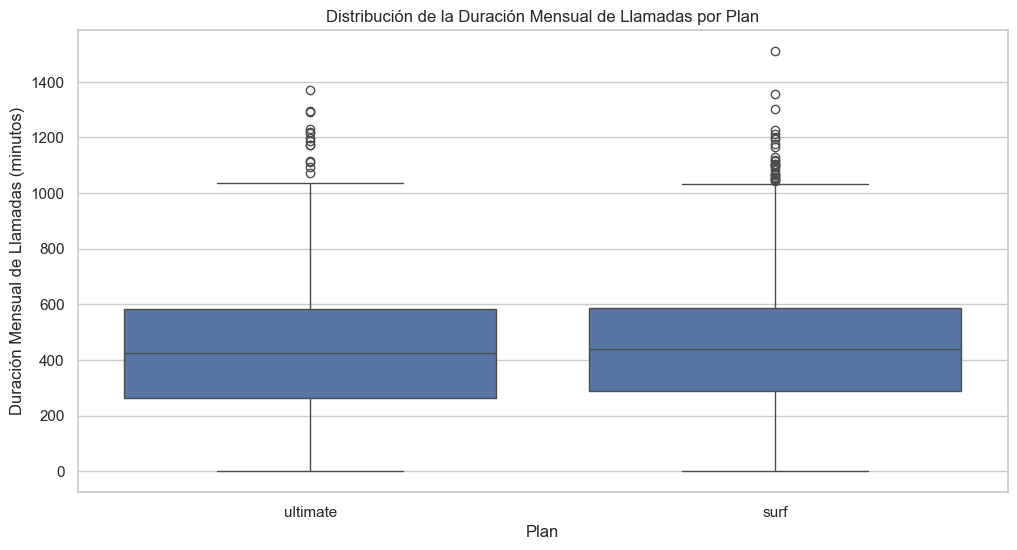

In [27]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(12, 6))
sns.boxplot(data=usage_data, x='plan', y='total_mins')

# Añadir etiquetas y título al gráfico
plt.title('Distribución de la Duración Mensual de Llamadas por Plan')
plt.xlabel('Plan')
plt.ylabel('Duración Mensual de Llamadas (minutos)')
plt.show()

### Conclusiones

Consistencia en el uso: Si las medianas y cuartiles de las duraciones mensuales de las llamadas son similares, significa que los usuarios de ambos planes tienen patrones de uso de llamadas bastante consistentes. Esto sugiere que las necesidades básicas de los usuarios en términos de minutos de llamada son similares sin importar el plan al que estén suscritos.

Elección de plan no influenciada por llamadas: Los usuarios pueden estar eligiendo entre estos dos planes basándose en factores distintos a las llamadas, como el costo de datos móviles, mensajes de texto, o beneficios adicionales proporcionados por cada plan.

### Mensajes

In [28]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Calcular el número promedio de mensajes por mes para cada plan
avg_messages_per_plan_month = usage_data.groupby(['plan', 'month'])['total_messages'].mean().reset_index()
avg_messages_per_plan_month = avg_messages_per_plan_month.rename(columns={'total_messages': 'avg_messages'})

# Mostrar las estadísticas descriptivas
print("Número promedio de mensajes por mes para cada plan:")
print(avg_messages_per_plan_month.head())

Número promedio de mensajes por mes para cada plan:
   plan  month  avg_messages
0  surf      1     21.000000
1  surf      2     21.600000
2  surf      3     21.937500
3  surf      4     24.685714
4  surf      5     33.547170


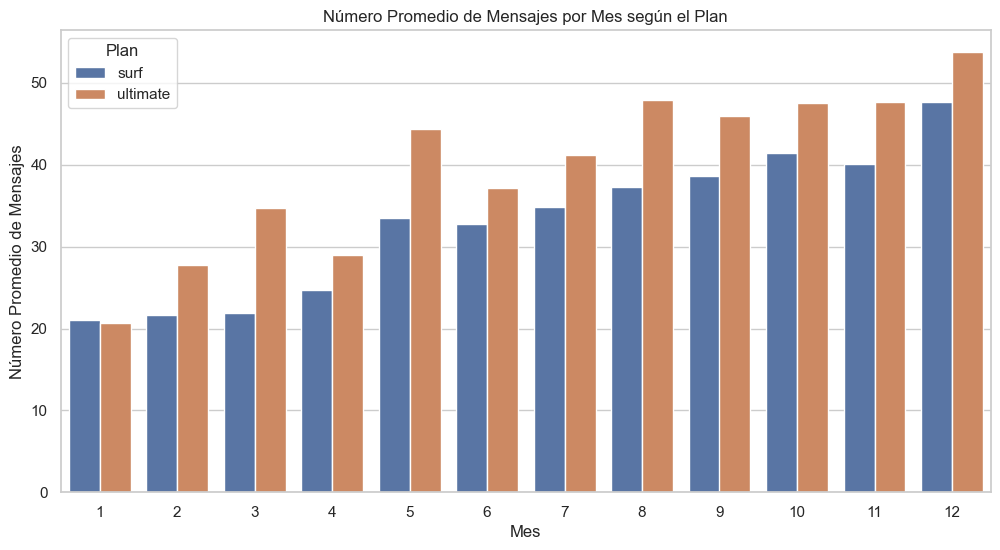

In [29]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_messages_per_plan_month, x='month', y='avg_messages', hue='plan')

# Añadir etiquetas y título al gráfico
plt.title('Número Promedio de Mensajes por Mes según el Plan')
plt.xlabel('Mes')
plt.ylabel('Número Promedio de Mensajes')
plt.legend(title='Plan')
plt.show()

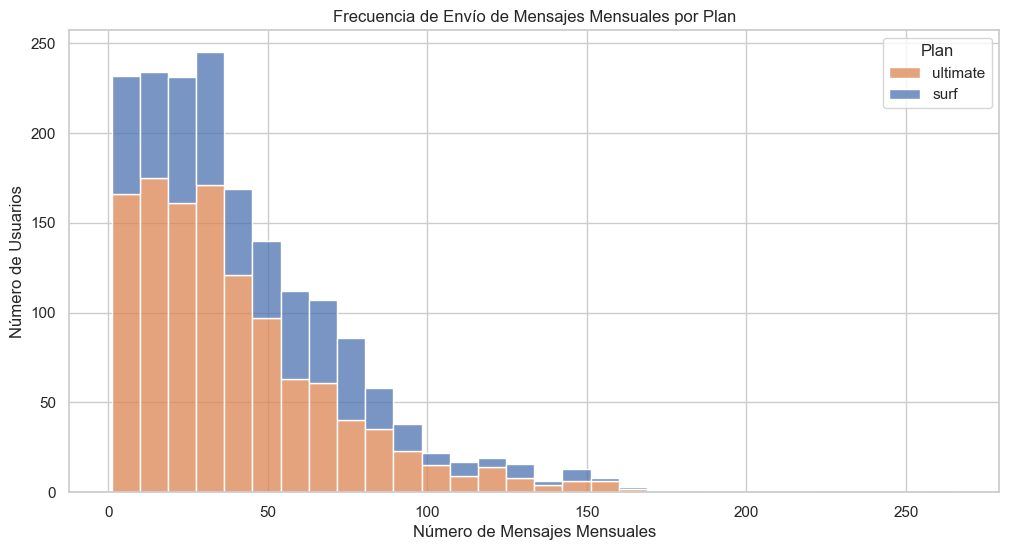

In [30]:
# Distribución de la frecuencia de envío de mensajes a través de los meses

# Crear un histograma para visualizar la frecuencia de envío de mensajes mensualmente
plt.figure(figsize=(12, 6))
sns.histplot(data=usage_data, x='total_messages', hue='plan', multiple='stack', bins=30, kde=False)

# Añadir etiquetas y título al gráfico
plt.title('Frecuencia de Envío de Mensajes Mensuales por Plan')
plt.xlabel('Número de Mensajes Mensuales')
plt.ylabel('Número de Usuarios')
plt.legend(title='Plan', labels=usage_data['plan'].unique())
plt.show()

In [31]:
# Calcular la media del número de mensajes enviados mensualmente
mean_messages = usage_data['total_messages'].mean()

# Calcular la varianza del número de mensajes enviados mensualmente
var_messages = usage_data['total_messages'].var()

# Mediana y desviación estándar
med_messages = usage_data['total_messages'].median()
std_messages = var_messages**0.5

# Mostrar los resultados
print(f"Media del número de mensajes enviados mensualmente: {mean_messages:.2f}")
print(f"Varianza del número de mensajes enviados mensualmente: {var_messages:.2f}")
print(f"Mediana del número de mensajes enviados mensualmente: {med_messages:.2f}")
print(f"Desviación estándar del número de mensajes enviados mensualmente: {std_messages:.2f}")

Media del número de mensajes enviados mensualmente: 41.78
Varianza del número de mensajes enviados mensualmente: 1067.55
Mediana del número de mensajes enviados mensualmente: 34.00
Desviación estándar del número de mensajes enviados mensualmente: 32.67


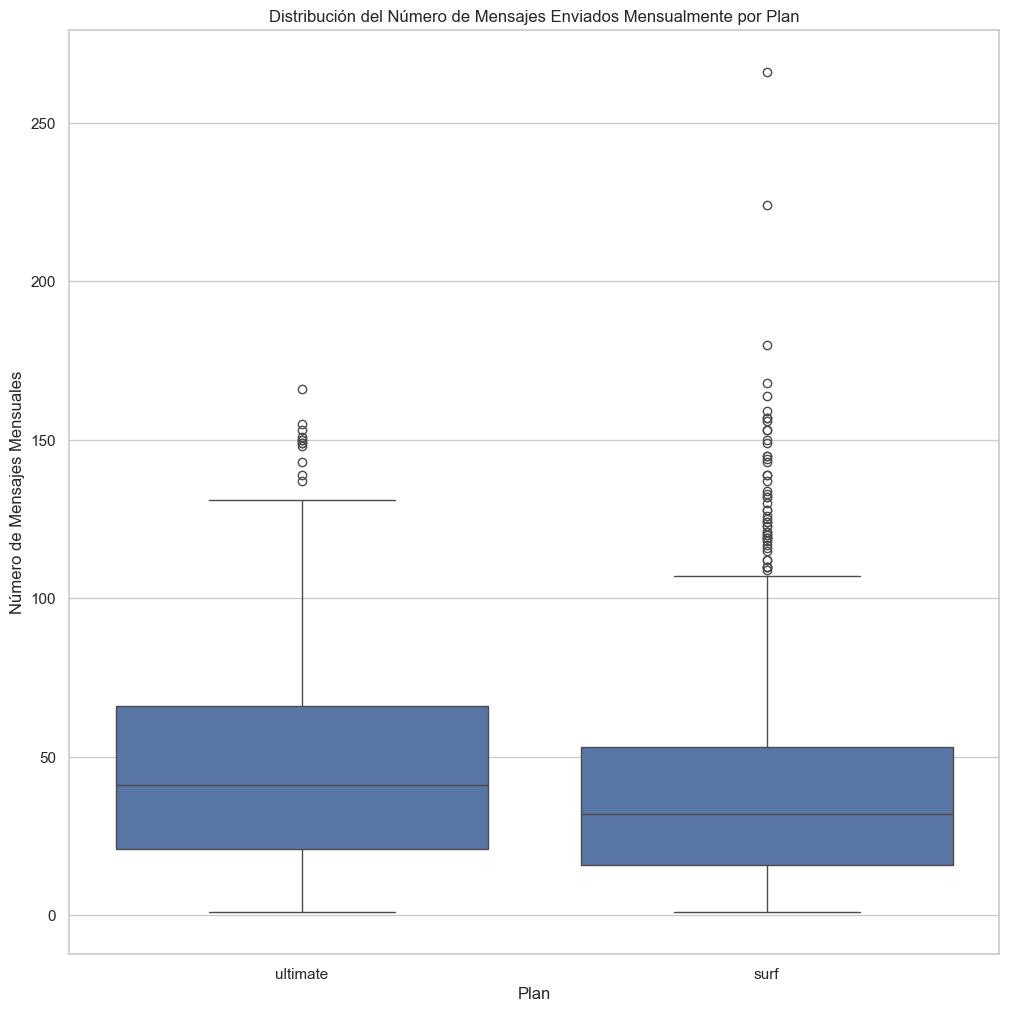

In [32]:
# Crear el diagrama de caja
plt.figure(figsize=(12, 12))
sns.boxplot(data=usage_data, x='plan', y='total_messages')

# Añadir etiquetas y título al gráfico
plt.title('Distribución del Número de Mensajes Enviados Mensualmente por Plan')
plt.xlabel('Plan')
plt.ylabel('Número de Mensajes Mensuales')
plt.show()

### Conclusiones

Podemos observar que las medias están muy cercanas entre sí. 

Para el plan ULTIMATE, podemos observar que, a pesar de los valores atípicos, se encuentran dentro de lo incluído, por lo que no genera un ingreso extra, aparte de la tarifa.

Por el otro lado, para el plan SURF, vemos que, a partir del 3er cuartil, ya exceden los mensajes incluidos, lo que genera ingresos extras por el exceso de mensajes.

Necesitamos continuar con el análisis para ver el ingreso real.

### Internet

In [33]:
# Comprara la cantidad de datos que tienden a utilizar cada mes los usuarios de cada plan
# Calcular el uso promedio de datos por mes para cada plan
avg_data_usage_per_plan_month = usage_data.groupby(['plan', 'month'])['gb_used'].mean().reset_index()
avg_data_usage_per_plan_month = avg_data_usage_per_plan_month.rename(columns={'gb_used': 'avg_gb_used'})

# Mostrar las estadísticas descriptivas
print("Uso promedio de datos por mes para cada plan:")
display(avg_data_usage_per_plan_month.head())


Uso promedio de datos por mes para cada plan:


,plan,month,avg_gb_used
0,surf,1,7.709756
1,surf,2,9.092543
2,surf,3,12.106780
3,surf,4,11.573331
4,surf,5,14.503339


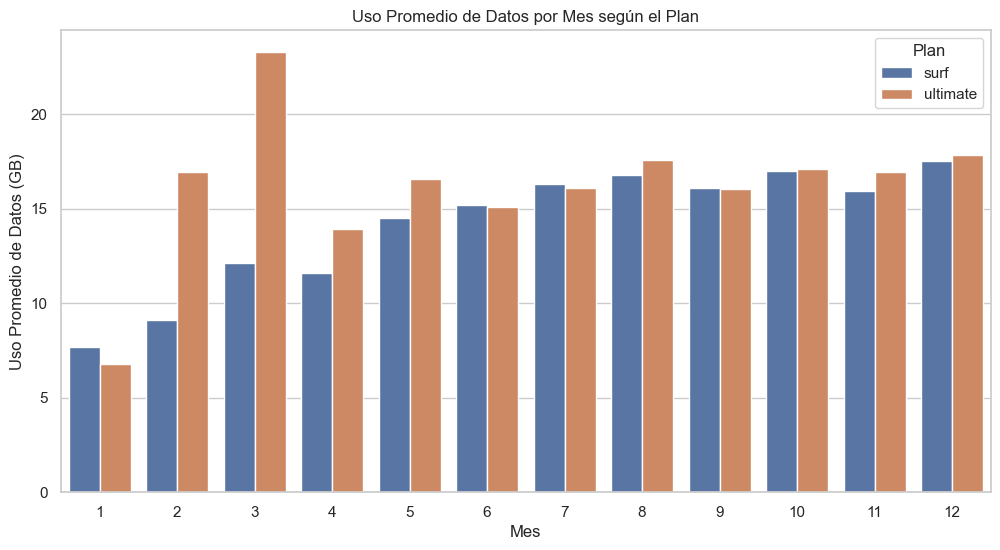

In [34]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_data_usage_per_plan_month, x='month', y='avg_gb_used', hue='plan')

# Añadir etiquetas y título al gráfico
plt.title('Uso Promedio de Datos por Mes según el Plan')
plt.xlabel('Mes')
plt.ylabel('Uso Promedio de Datos (GB)')
plt.legend(title='Plan')
plt.show()


In [35]:
# Calcular estadísticas descriptivas del uso de datos mensualmente por plan
data_stats = usage_data.groupby('plan')['gb_used'].agg(['mean', 'var', 'median', 'std']).reset_index()

# Mostrar los resultados
print("Estadísticas descriptivas del uso de datos mensualmente por plan:")
print(data_stats)

Estadísticas descriptivas del uso de datos mensualmente por plan:
       plan       mean        var     median       std
0      surf  16.239276  56.753293  16.473926  7.533478
1  ultimate  16.846676  56.353071  16.472129  7.506868


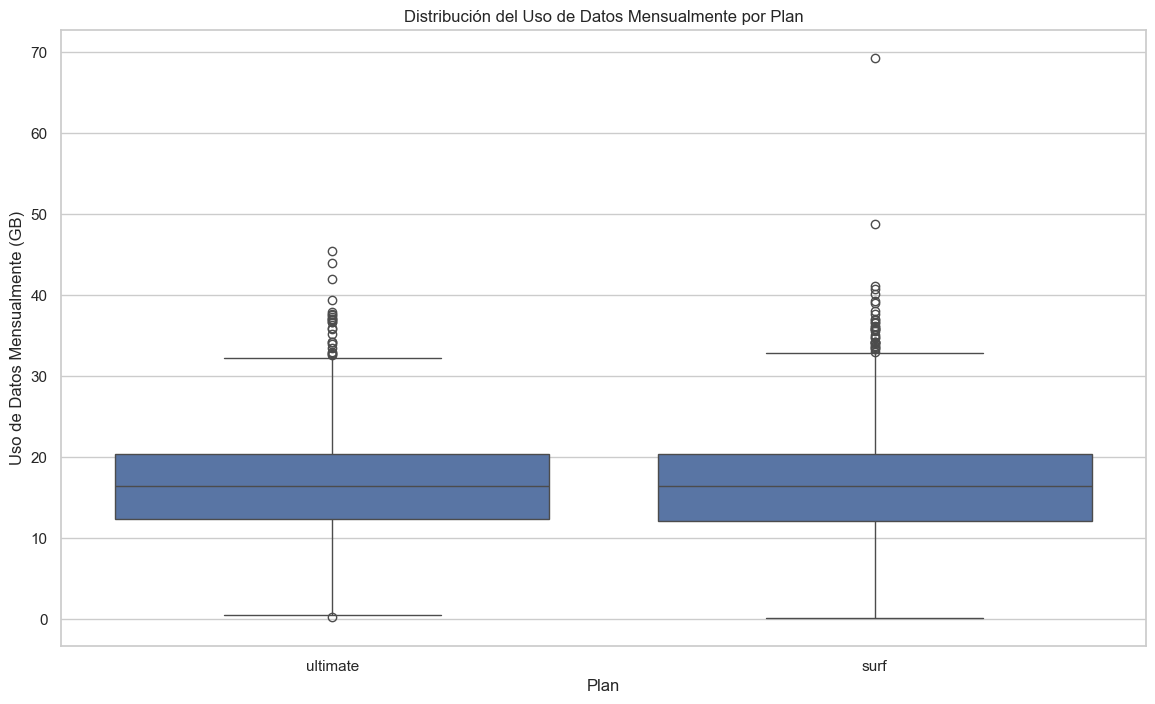

In [36]:
# Crear un diagrama de caja para visualizar la distribución del uso de datos mensualmente por plan
plt.figure(figsize=(14, 8))
sns.boxplot(data=usage_data, x='plan', y='gb_used')

# Añadir etiquetas y título al gráfico
plt.title('Distribución del Uso de Datos Mensualmente por Plan')
plt.xlabel('Plan')
plt.ylabel('Uso de Datos Mensualmente (GB)')
plt.show()

In [37]:
# Calcular los datos excedentes
usage_data['extra_gb'] = usage_data['gb_used'] - usage_data['gb_per_month_included']
usage_data['extra_gb'] = usage_data['extra_gb'].apply(lambda x: max(x, 0))

# Analizar la frecuencia de excesos de datos
excess_frequency = usage_data.groupby('plan')['extra_gb'].apply(lambda x: (x > 0).sum()).reset_index()
excess_frequency = excess_frequency.rename(columns={'extra_gb': 'excess_count'})

# Mostrar las estadísticas descriptivas
print("Frecuencia de usuarios que exceden los datos por plan:")
display(excess_frequency)

Frecuencia de usuarios que exceden los datos por plan:


,plan,excess_count
0,surf,696
1,ultimate,33


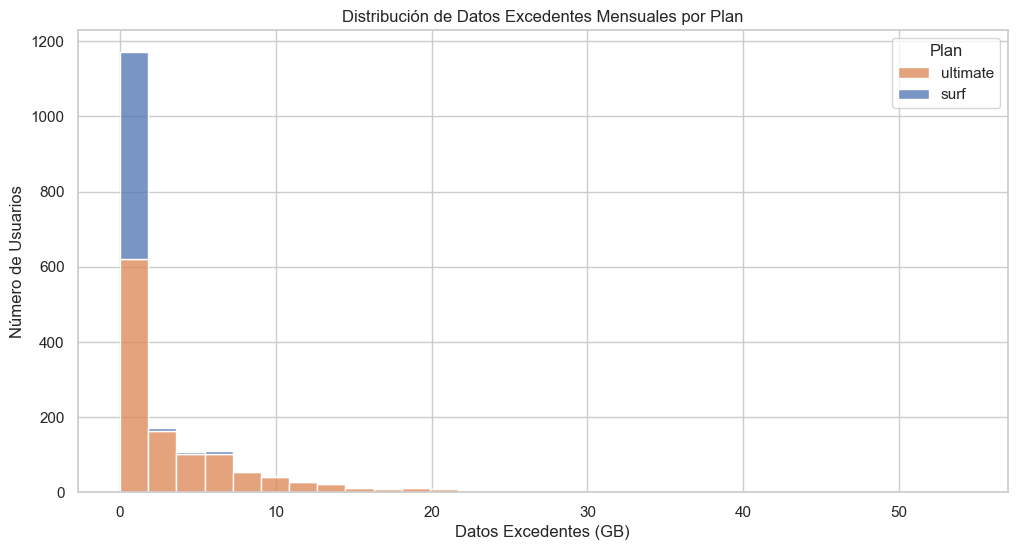

In [38]:
# Crear un histograma para visualizar los datos excedentes
plt.figure(figsize=(12, 6))
sns.histplot(data=usage_data, x='extra_gb', hue='plan', multiple='stack', bins=30, kde=False)

# Añadir etiquetas y título al gráfico
plt.title('Distribución de Datos Excedentes Mensuales por Plan')
plt.xlabel('Datos Excedentes (GB)')
plt.ylabel('Número de Usuarios')
plt.legend(title='Plan', labels=usage_data['plan'].unique())
plt.show()

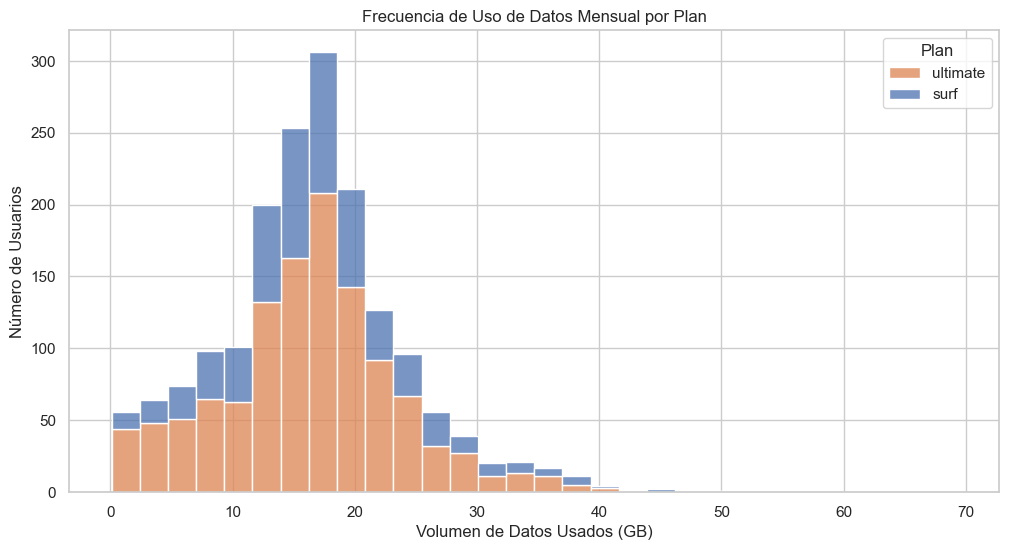

In [39]:
# Crear un histograma para visualizar la frecuencia de uso de datos mensual
plt.figure(figsize=(12, 6))
sns.histplot(data=usage_data, x='gb_used', hue='plan', multiple='stack', bins=30, kde=False)

# Añadir etiquetas y título al gráfico
plt.title('Frecuencia de Uso de Datos Mensual por Plan')
plt.xlabel('Volumen de Datos Usados (GB)')
plt.ylabel('Número de Usuarios')
plt.legend(title='Plan', labels=usage_data['plan'].unique())
plt.show()

### Conclusiones

Consistencia en el uso de Datos: 

Dado que tanto la media, la mediana, la varianza y la desviación estándar son similares en ambos planes, podemos concluir que los usuarios de ambos planes tienen patrones de uso de datos muy consistentes y comparables.

La diferencia marginal en el uso promedio de datos sugiere que los usuarios no seleccionan estos planes basándose únicamente en el uso de datos. Otros factores como el precio, beneficios adicionales, o la percepción de valor pueden estar influyendo en su elección.

Oportunidades de Ingresos:

Surf: Los usuarios que exceden sus límites de datos generan ingresos adicionales a través de los cargos por exceso. Sin embargo, también es importante equilibrar esto con la satisfacción del cliente.

Ultimate: Aunque hay menos ingresos por exceso en este plan, la satisfacción del cliente podría ser más alta debido a la adecuación del límite de datos.

Segmentación y Personalización:

Surf: Podríamos ofrecer recomendaciones a los usuarios que frecuentemente exceden sus límites para que consideren cambiarse al plan ultimate, o proporcionar opciones de paquetes de datos adicionales.

Ultimate: Mantener y promocionar este plan como una opción que ofrece más tranquilidad en cuanto al uso de datos, ideal para usuarios con necesidades de datos más altas.

## Ingreso

In [40]:
# Calcular estadísticas descriptivas de los ingresos por plan
income_stats = usage_data.groupby('plan')['monthly_revenue'].agg(['mean', 'var', 'median', 'std']).reset_index()

# Mostrar los resultados
print("Estadísticas descriptivas de los ingresos por plan:")
display(income_stats)

Estadísticas descriptivas de los ingresos por plan:


,plan,mean,var,median,std
0,surf,60.415839,2872.503215,41.035,53.595739
1,ultimate,72.248705,121.758108,70.000,11.034406


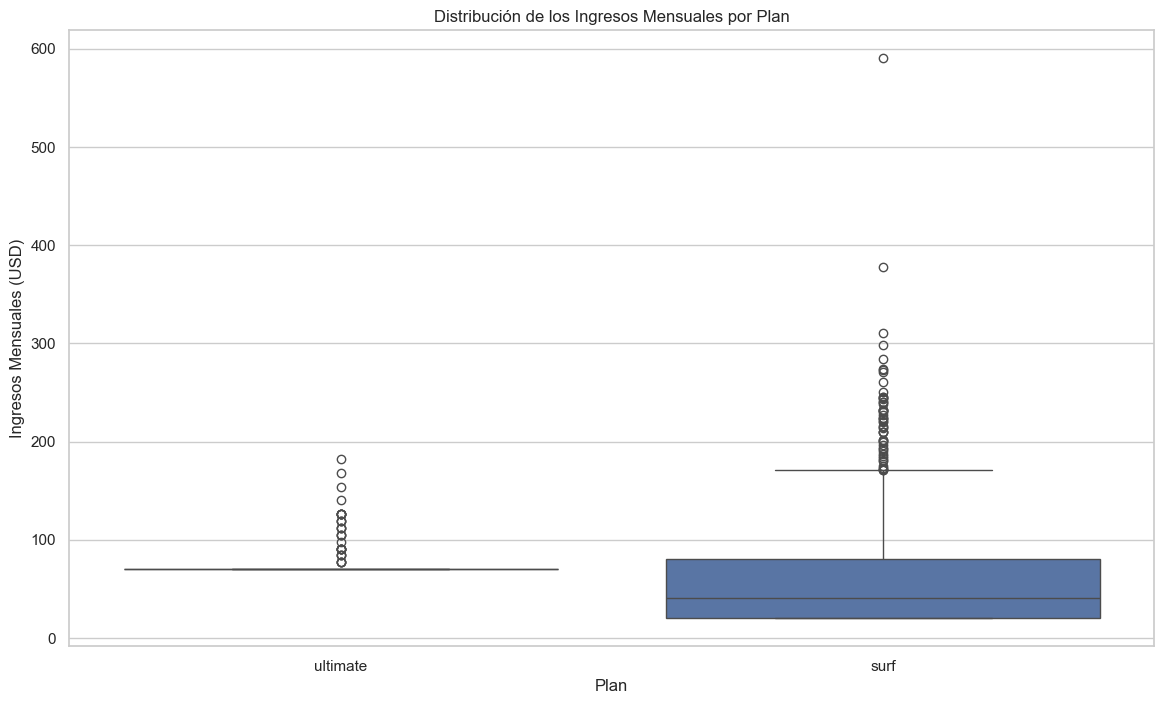

In [41]:
# Crear un diagrama de caja para visualizar la distribución de los ingresos mensuales por plan
plt.figure(figsize=(14, 8))
sns.boxplot(data=usage_data, x='plan', y='monthly_revenue')

# Añadir etiquetas y título al gráfico
plt.title('Distribución de los Ingresos Mensuales por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos Mensuales (USD)')
plt.show()

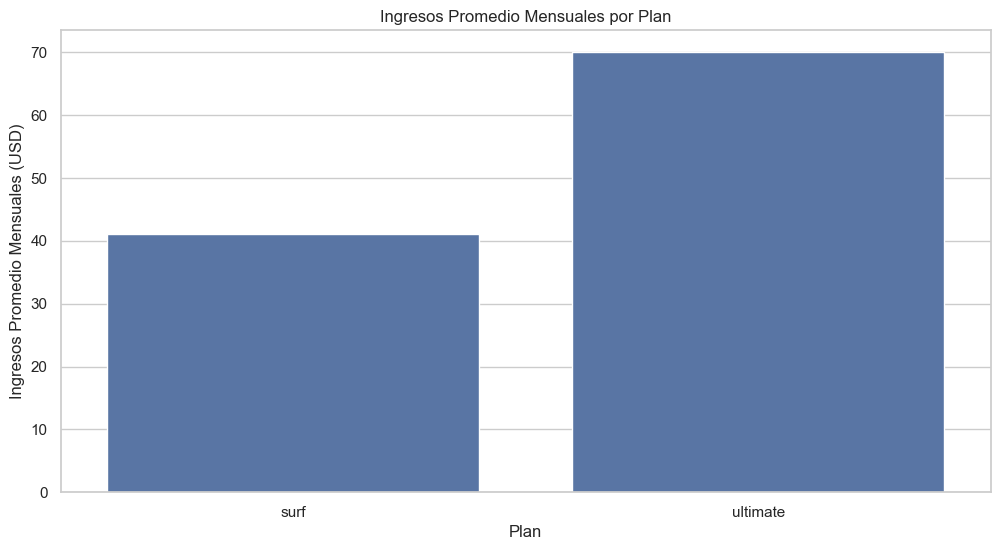

In [42]:
# Crear el gráfico de barras para visualizar los ingresos promedio mensuales por plan
plt.figure(figsize=(12, 6))
sns.barplot(data=income_stats, x='plan', y='median')

# Añadir etiquetas y título al gráfico
plt.title('Ingresos Promedio Mensuales por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos Promedio Mensuales (USD)')
plt.show()

### Conclusiones

En promedio, el plan ultimate genera más ingresos mensuales por usuario que el plan surf.

La mediana más baja en el plan surf sugiere que la mayoría de los usuarios generan ingresos menores en comparación con los usuarios del plan ultimate.

La varianza mucho mayor en el plan surf indica que hay una gran dispersión en los ingresos. Esto significa que los ingresos pueden variar significativamente entre los usuarios de este plan. En comparación, los ingresos del plan ultimate son mucho más consistentes (muy relacionado con los ingresos por internet).

La alta desviación estándar en el plan surf refuerza la idea de una gran variabilidad en los ingresos, mientras que el plan ultimate muestra una menor dispersión, indicando ingresos más uniformes.

Dado que el plan ultimate genera ingresos más elevados y consistentes, podría ser beneficioso promocionar más este plan o incentivar a los usuarios a cambiarse a él.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones. En este caso las gráficas de box-plots nos ayudan a identificar outiers que pueden sesgar nuestros resultados, especificamente las pruebas de hipótesis. Es por ello que con estás gráficas puedes complementar el análisis eliminando los valores atipicos. 
</div>

## Prueba las hipótesis estadísticas

### Prueba 1

Hipótesis nula (H0): Los ingresos promedio mensuales de los usuarios de los planes Ultimate y Surf son iguales.

Hipótesis alternativa (H1): Los ingresos promedio mensuales de los usuarios de los planes Ultimate y Surf son diferentes.

In [43]:
# Filtrar los datos por plan
surf_revenue = usage_data[usage_data['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = usage_data[usage_data['plan'] == 'ultimate']['monthly_revenue']

# Realizar la prueba t para muestras independientes
t_stat, p_value = ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

# Mostrar los resultados
print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación del valor p
if p_value < 0.05:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en los ingresos promedio entre los planes Ultimate y Surf.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que los ingresos promedio son diferentes entre los planes Ultimate y Surf.")

Estadístico t: -7.28
Valor p: 0.0000
Rechazamos la hipótesis nula. Hay una diferencia significativa en los ingresos promedio entre los planes Ultimate y Surf.


In [44]:
from scipy.stats import levene

# Realizar la prueba de Levene
levene_stat, levene_p_value = levene(surf_revenue, ultimate_revenue)

# Mostrar los resultados
print(f"Estadístico de Levene: {levene_stat:.2f}")
print(f"Valor p de Levene: {levene_p_value:.4f}")

# Interpretación del valor p
if levene_p_value < 0.05:
    print("Rechazamos la hipótesis nula de igualdad de varianzas. Las varianzas de los ingresos entre los planes Ultimate y Surf son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula de igualdad de varianzas. No hay evidencia suficiente para afirmar que las varianzas de los ingresos entre los planes Ultimate y Surf son diferentes.")


Estadístico de Levene: 339.23
Valor p de Levene: 0.0000
Rechazamos la hipótesis nula de igualdad de varianzas. Las varianzas de los ingresos entre los planes Ultimate y Surf son diferentes.


### Prueba 2

Hipótesis nula (H0): El ingreso promedio mensual de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.

Hipótesis alternativa (H1): El ingreso promedio mensual de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

In [45]:
usage_data['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA', 'Cleveland-Elyria, OH MSA',
       'Knoxville, TN MSA', 'New York-Newark-Jersey City, NY-NJ-PA MSA',
       'Pittsburgh, PA MSA', 'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA',
       'Birmingham-Hoover, AL MSA', 'Oklahoma City, OK MSA',
       'Charlotte-Concord-Gastonia, NC-SC MSA',
       'Denver-Aurora-Lakewood

In [46]:
# Filtrar los datos por región
ny_nj_revenue = usage_data[usage_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']
other_regions_revenue = usage_data[usage_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']

# Realizar la prueba t para muestras independientes
t_stat, p_value = ttest_ind(ny_nj_revenue, other_regions_revenue, equal_var=False)

# Mostrar los resultados
print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación del valor p
if p_value < 0.05:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en los ingresos promedio entre el área NY-NJ y otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que los ingresos promedio son diferentes entre el área NY-NJ y otras regiones.")

Estadístico t: -2.86
Valor p: 0.0045
Rechazamos la hipótesis nula. Hay una diferencia significativa en los ingresos promedio entre el área NY-NJ y otras regiones.


In [47]:
# Realizar la prueba de Levene
levene_stat_regions, levene_p_value_regions = levene(ny_nj_revenue, other_regions_revenue)

# Mostrar los resultados
print(f"Estadístico de Levene: {levene_stat_regions:.2f}")
print(f"Valor p de Levene: {levene_p_value_regions:.4f}")

# Interpretación del valor p
if levene_p_value_regions < 0.05:
    print("Rechazamos la hipótesis nula de igualdad de varianzas. Las varianzas de los ingresos entre el área NY-NJ y otras regiones son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula de igualdad de varianzas. No hay evidencia suficiente para afirmar que las varianzas de los ingresos entre el área NY-NJ y otras regiones son diferentes.")


Estadístico de Levene: 0.04
Valor p de Levene: 0.8434
No podemos rechazar la hipótesis nula de igualdad de varianzas. No hay evidencia suficiente para afirmar que las varianzas de los ingresos entre el área NY-NJ y otras regiones son diferentes.


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo desarrollando las pruebas de hipótesis. Además lo complementas con la prueba de levene para mostrar el supuest de varianzas iguales. 

### Conclusiones

Los planes Ultimate y Surf no solo tienen ingresos promedio diferentes, sino que también muestran una variabilidad en los ingresos significativamente distinta. El plan Ultimate genera ingresos más consistentes y elevados en comparación con el plan Surf, que muestra una gran variabilidad en los ingresos.

Aunque hay una diferencia significativa en los ingresos promedio entre el área NY-NJ y otras regiones, las varianzas de los ingresos son similares. Esto significa que, mientras que el monto de los ingresos puede variar entre estas regiones, la dispersión de esos ingresos es comparable.

## Conclusión general

### LLAMADAS:

Consistencia en el uso: Las medianas y cuartiles de las duraciones mensuales de las llamadas son similares entre ambos planes, lo que sugiere que los usuarios tienen patrones de uso de llamadas consistentes.

Elección del plan: La elección entre los planes Ultimate y Surf no parece estar influenciada significativamente por las llamadas, sino por otros factores como el costo de datos, mensajes de texto o beneficios adicionales.

### MENSAJES:

Medias cercanas: Las medias del número de mensajes enviados están muy cercanas entre sí para ambos planes.

Plan Ultimate: No genera ingresos extra por mensajes adicionales, ya que los valores atípicos aún están dentro de lo incluido en el plan.

Plan Surf: Genera ingresos extra a partir del tercer cuartil, ya que los usuarios exceden los mensajes incluidos en el plan.

### INTERNET:

Consistencia en el uso de datos: Las medias, medianas, varianzas y desviaciones estándar son similares en ambos planes, indicando patrones de uso de datos consistentes.

Factores de elección: Los usuarios no seleccionan los planes únicamente basándose en el uso de datos. Otros factores como el precio y beneficios adicionales influyen en su elección.

Oportunidades de ingresos:

Surf: Genera ingresos adicionales a través de los cargos por exceso de datos, aunque esto debe equilibrarse con la satisfacción del cliente.

Ultimate: Menos ingresos por exceso, pero mayor satisfacción del cliente debido a la adecuación del límite de datos.

Segmentación y personalización:

Surf: Recomendaciones para cambiarse al plan Ultimate o proporcionar paquetes de datos adicionales.

Ultimate: Promocionar este plan como una opción para usuarios con necesidades de datos más altas.

### PRUEBAS DE HIPÓTESIS:

Planes Ultimate y Surf: Existen diferencias significativas en los ingresos promedio, con variabilidad distinta. El plan Ultimate genera ingresos más consistentes y elevados.

Regiones NY-NJ y otras: Hay diferencias significativas en los ingresos promedio, aunque las varianzas son similares. Esto indica que los ingresos pueden variar entre regiones, pero su dispersión es comparable.

### INGRESOS:

Promedio mensual: El plan Ultimate genera más ingresos mensuales por usuario que el plan Surf.

Mediana y varianza: La mediana más baja y la varianza mucho mayor en el plan Surf indican ingresos menores y mayor dispersión en comparación con el plan Ultimate, que tiene ingresos más consistentes.

Desviación estándar: La alta desviación estándar en el plan Surf refuerza la idea de variabilidad en los ingresos, mientras que el plan Ultimate muestra ingresos más uniformes.

### Estrategia para el ajuste de publicidad: 

Promocionar más el plan Ultimate o incentivar a los usuarios a cambiarse a él debido a sus ingresos más elevados y consistentes.